# Menganalisa Data Tweet Tentang PPKM Darurat Yang Ada Di Indonesia

## 1. Import Library & Load Dataset Yang Telah Diberikan Label Sentimen Secara Manual

In [62]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
# Load dataset
data = pd.read_csv("Data Crawling.csv")
data.head()

,Username,Tweet,Sentimen
0,liz,ini sudah fix kah https pg2htfp2k1,negatif
1,celebritiesdotid,viral pemilik warkop ngamuk usai kena ppkm dar...,negatif
2,polri presisi,kegiatan ppkm darurat polresta tangerang penye...,positif
3,awal media nusantara | inspirasi dunia masa kini,patut ditiru begini cara yogyakarta hidupi pel...,positif
4,pelitanews,penyaluran bsps bulan juli desa arjawinangun d...,positif


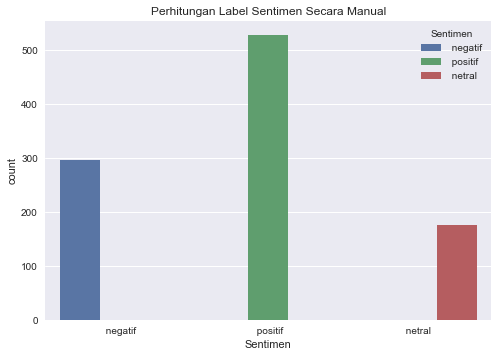

<Figure size 720x720 with 0 Axes>

In [64]:
# Melakukan visualisasi untuk kolom "Sentimen"

plt.style.use("seaborn")
plt.title("Perhitungan Label Sentimen Secara Manual")
sns.countplot(x="Sentimen", hue="Sentimen", data=data)
plt.figure(figsize=(10, 10))
plt.show()

In [65]:
# Menghitung sekaligus mengurutkan jumlah sentimen terbanyak berdasarkan tweet
jmlh_tweet = data.groupby("Sentimen").count()["Tweet"].reset_index().sort_values(by="Tweet", ascending=False)
jmlh_tweet.style.background_gradient(cmap="seismic")

,Sentimen,Tweet
2,positif,528
0,negatif,297
1,netral,175


Dapat dilihat dari visualisasi diatas, netizen twitter ketika melakukan tweet tentang topik PPKM Darurat mendapatkan label positif yang sangat tinggi daripada label negatif dan netral. Bahkan label positif mempunyai data sebanyak 528 tweet. Lalu pada label kedua yang paling banyak setelah label positif adalah label negatif yang memiliki nilai label sebanyak 297 sedangkan pada label netral hanya memiliki nilai sekitar 175 tweet saja.

In [66]:
# Mengecek tipe data dan juga mengecek apakah terdapat nilai NaN pada DataFrame "data" atau tidak
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  1000 non-null   object
 1   Tweet     1000 non-null   object
 2   Sentimen  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


## 2. Text-Processing (Tokenizing, Stopword, Stemming)

### Tokenizing 

In [67]:
# Melakukan Tahapan Tokenisasi. 
# Tokenisasi adalah tahapan prepocessing data yang digunakan untuk membagi kalimat menjadi perkata
def tokennization(text):
    return word_tokenize(text)

data["Tweet_Tokenizing"] = data["Tweet"].apply(tokennization)
data.head()

,Username,Tweet,Sentimen,Tweet_Tokenizing
0,liz,ini sudah fix kah https pg2htfp2k1,negatif,"[ini, sudah, fix, kah, https, pg2htfp2k1]"
1,celebritiesdotid,viral pemilik warkop ngamuk usai kena ppkm dar...,negatif,"[viral, pemilik, warkop, ngamuk, usai, kena, p..."
2,polri presisi,kegiatan ppkm darurat polresta tangerang penye...,positif,"[kegiatan, ppkm, darurat, polresta, tangerang,..."
3,awal media nusantara | inspirasi dunia masa kini,patut ditiru begini cara yogyakarta hidupi pel...,positif,"[patut, ditiru, begini, cara, yogyakarta, hidu..."
4,pelitanews,penyaluran bsps bulan juli desa arjawinangun d...,positif,"[penyaluran, bsps, bulan, juli, desa, arjawina..."


Setelah melakukan tahapan tokenisasi, kami melakukan proses filtering. Proses filtering merupakan tahapan mengambil kata-kata dari tahapan tokenisasi dan algoritma yang kami lakukan yaitu stopword. Stopword merupakan sebuah tahapan bagian dari filtering dengan membuang kata-kata yang tidak deskriptif dalam melakukan pendekatan bag-of-words.

### Stopword

In [68]:
# Proses Filtering dari kolom "Tweet_Tokenizing"
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

list_delete = ["yang", "ke", "antara", "dua", "jhdv9izr6h", "tdobjv99sv", "ia", "seperti", 
               "tidak", "oleh", "saat", "wlbqqytjtm", "3sppnbagpd", "harus", "sementara", 
               "sekitar", "serta", "di", "dari", "912rczggkp", "telah", "sebagai", "masih", 
               "hal", "ue97fynts4", "bdihmgspm9", "bahwa", "atau", "hanya", "ada", "mereka", 
               "ue97fynts4", "agar", "lain", "anda", "begitu", "kczssgbjl8", "yaitu", "yakni", "daripada", "itulah", 
               "demi", "dimana", "pula", "sambil", "sebelum", "fawhfl", "sesudah",
               "guna", "ia", "dengan", "oleh", "https", "pg2htfp2k1", "cxjfn9znsd", "ewacaz7sgk", 
               "smsjdyljv2", "smsjdycuma", "an0lzrbabf", "sxds5zx6lk", "fyaukusjxj", "qynqv4kplq"]

list_stopwords = stopwords.words("indonesian")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
# Mendeklarasikan fungsi untuk list_stopwords
def stopword(text):
    return [word for word in text if word not in list_stopwords]

data["Tweet_Stopword"] = data["Tweet_Tokenizing"].apply(stopword)

In [70]:
# Mendeklarasikan fungsi untuk list_delete
def stopwords_removal(text):
    return [word for word in text if word not in list_delete]

data["Tweet_Stopword"] = data["Tweet_Stopword"].apply(stopwords_removal)
data.head()

,Username,Tweet,Sentimen,Tweet_Tokenizing,Tweet_Stopword
0,liz,ini sudah fix kah https pg2htfp2k1,negatif,"[ini, sudah, fix, kah, https, pg2htfp2k1]","[fix, kah]"
1,celebritiesdotid,viral pemilik warkop ngamuk usai kena ppkm dar...,negatif,"[viral, pemilik, warkop, ngamuk, usai, kena, p...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d..."
2,polri presisi,kegiatan ppkm darurat polresta tangerang penye...,positif,"[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,..."
3,awal media nusantara | inspirasi dunia masa kini,patut ditiru begini cara yogyakarta hidupi pel...,positif,"[patut, ditiru, begini, cara, yogyakarta, hidu...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku..."
4,pelitanews,penyaluran bsps bulan juli desa arjawinangun d...,positif,"[penyaluran, bsps, bulan, juli, desa, arjawina...","[penyaluran, bsps, juli, desa, arjawinangun, d..."


### Normalisasi 

In [71]:
# Melakukan perubahan kalimat dasar dari bahasa selain bahasa indonesia menjadi bahasa indonesia dengan proses normalisasi
# Normasliasasi merupakan sebuah teknik untuk mengubah kata-kata "gaul" menjadi kalimat yang tepat
normalize_word = {"hsil":"hasil",
                 "yng":"yang",
                 "ny":"nya",
                 "hsil":"hasil",
                 "lohh":"loh",
                 "tdk":"tidak",
                 "ampe":"sampai",
                 "moga":"semoga",
                 "sy":"saya",
                 "td":"tadi",
                 "gw":"gue",
                 "slh":"salah",
                 "penjarahanmassal":"penjarahan massal",
                 "mintamaaf":"maaf"}

def normalized_words(document):
    return [normalize_word[term] if term in normalize_word else term for term in document]

data["Tweet_Normalisasi"] = data["Tweet_Stopword"].apply(normalized_words)
data.head()

,Username,Tweet,Sentimen,Tweet_Tokenizing,Tweet_Stopword,Tweet_Normalisasi
0,liz,ini sudah fix kah https pg2htfp2k1,negatif,"[ini, sudah, fix, kah, https, pg2htfp2k1]","[fix, kah]","[fix, kah]"
1,celebritiesdotid,viral pemilik warkop ngamuk usai kena ppkm dar...,negatif,"[viral, pemilik, warkop, ngamuk, usai, kena, p...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d..."
2,polri presisi,kegiatan ppkm darurat polresta tangerang penye...,positif,"[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,..."
3,awal media nusantara | inspirasi dunia masa kini,patut ditiru begini cara yogyakarta hidupi pel...,positif,"[patut, ditiru, begini, cara, yogyakarta, hidu...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku..."
4,pelitanews,penyaluran bsps bulan juli desa arjawinangun d...,positif,"[penyaluran, bsps, bulan, juli, desa, arjawina...","[penyaluran, bsps, juli, desa, arjawinangun, d...","[penyaluran, bsps, juli, desa, arjawinangun, d..."


Tahapan terakhir dalam text mining yang kami lakukan adalah proses stemming. Teknik Stemming merupakan sebuah tahapan kegiatan text preprocessing untuk memperkecil jumlah indeks yang berbeda dari suatu data dan juga untuk melakukan pengelompokan kata-kata lain yang memiliki kata dasar dan arti yang serupa namun memiliki bentuk yang berbeda karena mendapatkan imbuhan yang berbeda pula.

### Stemming 

In [72]:
# Proses Stemming dibantu dengan bantuan swifter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter # Swifter berfungsi untuk mempercepat froses stemming pada Dataframe dengan menjalankan task secara parallel

# Membuat Stemmer dari sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stemming
def stemming(text):
    return stemmer.stem(text)

term_dict = {}

# Menghitung ada berapa kata/words di dalam kolom "Tweet_Normalisasi"
for document in data["Tweet_Normalisasi"]:
    for text in document:
        if text not in term_dict:
            term_dict[text] = " "
            
print(len(term_dict))
print("------------------------")

# Menampilkan isi kata/words yang telah dilakukan proses stemming
for text in term_dict:
    term_dict[text] = stemming(text)
    print(text,":" ,term_dict[text])
    
print(term_dict)
print("------------------------")

# Membuat fungsi baru untuk proses stemming
def stemming_word(document):
    return [term_dict[text] for text in document]

data["Tweet_Stemming"] = data["Tweet_Normalisasi"].swifter.apply(stemming_word)

4604
------------------------
fix : fix
kah : kah
viral : viral
pemilik : milik
warkop : warkop
ngamuk : ngamuk
kena : kena
ppkm : ppkm
darurat : darurat
ancam : ancam
ceraikan : cerai
istri : istri
celebritiesdotid : celebritiesdotid
infocelebterkini : infocelebterkini
aanw8kbu0h : aanw8kbu0h
kegiatan : giat
polresta : polresta
tangerang : tangerang
penyekatan : sekat
kendaraan : kendara
pembagian : bagi
bansos : bansos
polrikawalppkm : polrikawalppkm
polripresisi : polripresisi
tyf8exkljr : tyf8exkljr
patut : patut
ditiru : tiru
yogyakarta : yogyakarta
hidupi : hidup
pelaku : laku
kuliner : kuliner
wnkvu2tej9 : wnkvu2tej9
awalmedianusantara : awalmedianusantara
berita : berita
penyaluran : salur
bsps : bsps
juli : juli
desa : desa
arjawinangun : arjawinangun
ditengah : tengah
pandemi : pandemi
covid : covid
bcstzzymnz : bcstzzymnz
2021 : 2021
89uz2dzrgz : 89uz2dzrgz
mekanisme : mekanisme
lokasi : lokasi
pengendalian : kendali
mobilitas : mobilitas
jalan : jalan
tol : tol
jasa : jasa


polrestabes : polrestabes
semarang : semarang
hukum : hukum
genuk : genuk
divhumas : divhumas
polri : polri
bidhumasjateng : bidhumasjateng
humastabessmg : humastabessmg
t5qgrd3z1q : t5qgrd3z1q
pei : pei
prillie : prillie
ndrews110611 : ndrews110611
dangdutempire : dangdutempire
kurawa : rawa
militannkri01 : militannkri01
teruskan : terus
mari : mari
lihat : lihat
kesabaran : sabar
menghadapinya : hadap
atay : atay
koreanbobadream : koreanbobadream
sadar : sadar
xmigtg8zuy : xmigtg8zuy
ponytail : ponytail
vernon : vernon
terealisasikan : realisasi
hcnyu0knzo : hcnyu0knzo
ayo : ayo
bersatu : satu
sukseskan : sukses
sebarkan : sebar
semangat : semangat
berbagi : bagi
membantu : bantu
saudara : saudara
membutuhkan : butuh
satlantasrescilegon : satlantasrescilegon
fvok56myrp : fvok56myrp
besok : besok
pariaman : pariaman
berlakukan : laku
destinasi : destinasi
wisata : wisata
ditutup : tutup
duwzwyehxb : duwzwyehxb
tribunnews : tribunnews
psbb : psbb
dampak : dampak
terimakasih : terimakas

petugas : tugas
ttg : ttg
j24tvehjqm : j24tvehjqm
kumparan : kumpar
apel : apel
busuk : busuk
buang : buang
busuknya : busuk
sisa : sisa
dimakan : makan
kenyang : kenyang
tambahkan : tambah
bakti : bakti
bondowoso : bondowoso
1vaqivku6z : 1vaqivku6z
lebur : lebur
yok : yok
mumpung : mumpung
mukulin : mukulin
saran : saran
bandara : bandara
menhan : menhan
menkes : menkes
briefing : briefing
matangkan : matang
target : target
selesaikan : selesai
pertahanan : tahan
gini : gin
bang : bang
acara : acara
tau : tau
mreka : mreka
menengah : tengah
keatas : atas
ketakutan : takut
perutnya : perut
terjamin : jamin
turunan : turun
melanjutkan : lanjut
wajib : wajib
vaksinasi : vaksinasi
masal : masal
sanksi : sanksi
kayak : kayak
eropa : eropa
aman : aman
sih : sih
didorong : dorong
miskin : miskin
oke : oke
dapet : dapet
300 : 300
tunai : tunai
kayanya : kaya
pengusaha : usaha
umkm : umkm
kelas : kelas
krisis : krisis
make : make
sense : sense
heli : heli
polda : polda
sumut : sumut
sebar : se

ikhtiaratasipandemi : ikhtiaratasipandemi
d0vrmyr3uv : d0vrmyr3uv
wabup : wabup
lumajang : lumajang
ambil : ambil
gaji : gaji
sumbangkan : sumbang
o3ucsszd07 : o3ucsszd07
pejabat : jabat
bupatilumajang : bupatilumajang
sumbangkangaji : sumbangkangaji
takambilgaji : takambilgaji
videoviral : videoviral
selesai : selesai
update : update
zbcrvms6nh : zbcrvms6nh
blm : blm
kejelasan : jelas
aneh : aneh
bener : bener
memangnya : memang
menentukan : tentu
ngurus : ngurus
amatiran : amatir
dipikir : pikir
perusahaan : usaha
kepastian : pasti
bemui : bui
official : official
pemenuhan : penuh
kebutuhan : butuh
klean : klean
perjuangkan : juang
diam : diam
umur : umur
perjuangan : juang
eru7rrt2wa : eru7rrt2wa
y1hrc46ptu : y1hrc46ptu
jagajakarta : jagajakarta
jakartabangkit : jakartabangkit
arxctfada6 : arxctfada6
mendekati : dekat
sapi : sapi
kambing : kambing
pengemudi : kemudi
ojek : ojek
ojol : ojol
diperboleh : boleh
melintasi : lintas
100 : 100
titik : titik
surat : surat
tanda : tanda
regi

10gbgwyi8y : 10gbgwyi8y
pengantar : antar
presidem : presidem
j2d6fqxaia : j2d6fqxaia
dqmpdcvna3 : dqmpdcvna3
kxzpoxppkj : kxzpoxppkj
2hoiuibeav : 2hoiuibeav
snx72pzmp8 : snx72pzmp8
btw : btw
sedih : sedih
bgt : bgt
semenjak : semenjak
datangnya : datang
ntar : ntar
lebaran : lebaran
haji : haji
hmmm : hmmm
merajok : rajok
sat : sat
lantas : lantas
dishub : dishub
pol : pol
7uwjrcikfk : 7uwjrcikfk
adlwbpwd1b : adlwbpwd1b
menahan : tahan
qfvlobatm2 : qfvlobatm2
kabinetnya : kabinet
7uiwn1olrk : 7uiwn1olrk
inga : inga
kleru : kleru
cnnindonesia : cnnindonesia
detikcom : detikcom
kompascom : kompascom
fadlizon : fadlizon
x1nyauegxl : x1nyauegxl
terkendali : kendali
gzvo0cd6ej : gzvo0cd6ej
2narxod3yo : 2narxod3yo
dihentikan : henti
y6hnyletyi : y6hnyletyi
politikus : politikus
pan : pan
7ehkvgmhdu : 7ehkvgmhdu
room : room
gaya : gaya
memperbanyak : banyak
menerus : terus
mengakibatkan : akibat
spa : spa
plus : plus
p6twqmnfqh : p6twqmnfqh
oxdwew3whq : oxdwew3whq
kampanyekan : kampanye
dima

guka6alnag : guka6alnag
tyassiwi : tyassiwi
wwkwk : wwkwk
tahanan : tahan
yas : yas
xz6uamqk0r : xz6uamqk0r
ekswon : ekswon
reboot : reboot
bripka : bripka
gondokusuman : gondokusuman
pengaturan : atur
arus : arus
lalilintas : lalilintas
langensari : langensari
klitren : klitren
2t4utn4lqy : 2t4utn4lqy
joongdok : joongdok
canon : canon
dimaafkan : maaf
modalnya : modal
menjerit : jerit
lalang : lalang
kocujge83l : kocujge83l
dki : dki
metropolitan : metropolitan
apbd : apbd
seribu : ribu
perak : perak
sang : sang
raja : raja
tega : tega
arab : arab
ngeri : ngeri
tgl : tgl
kjp : kjp
siswa : siswa
cair : cair
dishare : dishare
pendengar : dengar
numpuk : numpuk
ngobrol : ngobrol
ngerasa : ngerasa
kubantu : bantu
lega : lega
zjjnfbjnb8 : zjjnfbjnb8
pembinaan : bina
penindakan : tindak
magetan : magetan
pbjhfxhlij : pbjhfxhlij
xxialxxi : xxialxxi
porcelain : porcelain
iqbal : iqbal
terharu : haru
nangis : nang
mulia : mulia
harap : harap
tuitan : tuit
lawan : lawan
lotofvlaxl : lotofvlaxl


penanggung : tanggung
panit : panit
sabhara : sabhara
aiptu : aiptu
heri : heri
suratin : suratin
pawas : pawas
budi : budi
eka : eka
kentungan : kentung
depok : depok
2lp4vpy4uj : 2lp4vpy4uj
batunya : batu
ulah : ulah
pasutri : pasutri
tipu : tipu
pos : pos
uys6xcyzvi : uys6xcyzvi
melintas : lintas
pwhzal5efd : pwhzal5efd
zsvd2q65cb : zsvd2q65cb
intel : intel
tracking : tracking
getol : getol
rumus : rumus
puanmaharaniri : puanmaharaniri
bambang : bambang
soesatyo : soesatyo
acowegmyw7 : acowegmyw7
ditentuka : ditentuka
bsfg835gdb : bsfg835gdb
57yxoc8yil : 57yxoc8yil
perketat : ketat
jguzilcqva : jguzilcqva
kyjfl92mbk : kyjfl92mbk
maritim : maritim
j1zbiqyow3 : j1zbiqyow3
08xlxibkoe : 08xlxibkoe
iraasty : iraasty
cielah : cielah
focl3fddld : focl3fddld
xrrmdqfk8s : xrrmdqfk8s
mendes : mendes
pdtt : pdtt
abdul : abdul
halim : halim
iskandar : iskandar
percepatan : cepat
proses : proses
blt : blt
thread : thread
mulaidaridesa : mulaidaridesa
indonesiapulih : indonesiapulih
jkzkvnt6mq : 

society : society
membahas : bahas
dihadiri : hadir
plh : plh
sekretaris : sekretaris
herman : herman
hanapi : hanapi
kejaksaan : jaksa
dian : dian
suryandari : suryandari
baqt27mxk9 : baqt27mxk9
diselenggarakan : selenggara
sukajaya : sukajaya
lempasing : lempasing
teluk : teluk
pesawaran : sawar
8vlzzbv0in : 8vlzzbv0in
lewati : lewat
menunjukan : tunjuk
vwkxfutsjw : vwkxfutsjw
ojolviral : ojolviral
alangkah : alangkah
baiknya : baik
terbaik : baik
tekankan : tekan
kelarrr : kelarrr
nsctclr0ez : nsctclr0ez
null : null
sosiolog : sosiolog
daisy : daisy
member : member
nnvg3rqmmt : nnvg3rqmmt
nasirltp : nasirltp
ppkmdm : ppkmdm
makamnya : makam
girls : girls
generation : generation
come : come
back : back
wamenkes : wamenkes
keterisian : isi
stabil : stabil
i6ubz3imhn : i6ubz3imhn
astagfirullah : astagfirullah
dipersulit : sulit
sehari : hari
jln : jln
keamanan : aman
kartu : kartu
disyaratkan : syarat
vhm7nabfqn : vhm7nabfqn
3ayeufusvv : 3ayeufusvv
kemnaker : kemnaker
berupaya : upaya


purbalingga : purbalingga
menggelar : gelar
serentak : serentak
dkzzfhitb2 : dkzzfhitb2
pendekatan : dekat
menerbitkan : terbit
vaksinasinasional : vaksinasinasional
ayovaksin : ayovaksin
gerakanberbagiuntukwarga : gerakanberbagiuntukwarga
bjnfrmd3el : bjnfrmd3el
0wqb4tita2 : 0wqb4tita2
diwakili : wakil
kasubagbin : kasubagbin
zulfikar : zulfikar
menghadiri : hadir
comand : comand
jaksa : jaksa
agungri : agungri
kejaksaanrb : kejaksaanrb
kejati : kejat
maifazxrey : maifazxrey
m1gzh8kivm : m1gzh8kivm
propinsi : propinsi
kru : kru
ketentuan : tentu
pati : pati
ingatpesanibu : ingatpesanibu
mencuci : cuci
sabun : sabun
kxqgqe0gvk : kxqgqe0gvk
ioae7ixohq : ioae7ixohq
lindungi : lindung
m8izs56pwp : m8izs56pwp
bln : bln
menghindar : hindar
menyampaikannya : sampai
l1730vq6m2 : l1730vq6m2
olietamami : olietamami
lizaariani5 : lizaariani5
pelanggarnya : langgar
tolol : tolol
tarik : tarik
waras : waras
buas : buas
ngentot2ama : ngentot2ama
gasuka : gasuka
memenya : memenya
lelucon : lelucon
l

kix4kyk39k : kix4kyk39k
bpmi : bpmi
setpres : setpres
rilispresiden : rilispresiden
8koriezq7x : 8koriezq7x
vesrbqwu2c : vesrbqwu2c
mengarah : arah
pemalang : malang
polantaspupurbalingga : polantaspupurbalingga
qh0qvtt8s1 : qh0qvtt8s1
cikupa : cikupa
putar : putar
manapun : mana
dirimu : diri
kucintai : cinta
ik8utyil6i : ik8utyil6i
bahu : bahu
membahu : bahu
mentaati : taat
ditetapkan : tetap
musibah : musibah
memerangi : rang
menanggulangi : tanggulang
mass : mass
j0jm1zn4md : j0jm1zn4md
kadang : kadang
disalahpahami : disalahpahami
mpr : mpr
suasananya : suasana
beriringan : iring
berbeda : beda
mendesak : desak
mencegah : cegah
arti : arti
terganggu : ganggu
ketidaktersediaan : ketidaktersediaan
bahan : bahan
ngebul : ngebul
fraksi : fraksi
muzanigerindra : muzanigerindra
bjsrzlj7mb : bjsrzlj7mb
kegaduhan : gaduh
36aizrdhlw : 36aizrdhlw
dmewqm2nwc : dmewqm2nwc
taag0a8jnd : taag0a8jnd
rvykqzoeam : rvykqzoeam
pernyataan : nyata
stayactive : stayactive
kader : kader
cekcok : cekcok
n

pdiperjuangan : pdiperjuangan
alisyarief : alisyarief
muhajir : muhajir
galau : galau
komando : komando
diambil : ambil
alih : alih
berwenang : wenang
eksekusi : eksekusi
doorstop : doorstop
kelalaian : lalai
atuh : atuh
pidato : pidato
teges : teges
dmn : dmn
s6fxkl2fdt : s6fxkl2fdt
alf5k23e1m : alf5k23e1m
qbfjhissr2 : qbfjhissr2
acckle6lyj : acckle6lyj
xfbvsvawpa : xfbvsvawpa
fudm6xubu3 : fudm6xubu3
qnzy6grol9 : qnzy6grol9
z7h139py74 : z7h139py74
hwens7dqdk : hwens7dqdk
r6wafdkuk2 : r6wafdkuk2
ibwcle3tn2 : ibwcle3tn2
llhj3xdamy : llhj3xdamy
terika : terika
srikandiprabowo : srikandiprabowo
sukunnya : sukun
digoreng : goreng
yummy : yummy
wuenak : wuenak
mampir : mampir
sukun : sukun
nongki : nongki
insya : insya
ngopi : ngopi
x7gchcn52c : x7gchcn52c
isoman : isoman
lfk6weljom : lfk6weljom
tribunbanten : tribunbanten
wfh : wfh
lelah : lelah
berbuat : buat
rjpolflpzx : rjpolflpzx
follow : follow
like : like
comment : comment
subscrine : subscrine
terkini : kini
sukabumi : sukabumi
bans

In [73]:
# Melihat DataFrame dari hasil pemrosesan sementara
data.head()

,Username,Tweet,Sentimen,Tweet_Tokenizing,Tweet_Stopword,Tweet_Normalisasi,Tweet_Stemming
0,liz,ini sudah fix kah https pg2htfp2k1,negatif,"[ini, sudah, fix, kah, https, pg2htfp2k1]","[fix, kah]","[fix, kah]","[fix, kah]"
1,celebritiesdotid,viral pemilik warkop ngamuk usai kena ppkm dar...,negatif,"[viral, pemilik, warkop, ngamuk, usai, kena, p...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d...","[viral, milik, warkop, ngamuk, kena, ppkm, dar..."
2,polri presisi,kegiatan ppkm darurat polresta tangerang penye...,positif,"[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,...","[giat, ppkm, darurat, polresta, tangerang, sek..."
3,awal media nusantara | inspirasi dunia masa kini,patut ditiru begini cara yogyakarta hidupi pel...,positif,"[patut, ditiru, begini, cara, yogyakarta, hidu...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku...","[patut, tiru, yogyakarta, hidup, laku, kuliner..."
4,pelitanews,penyaluran bsps bulan juli desa arjawinangun d...,positif,"[penyaluran, bsps, bulan, juli, desa, arjawina...","[penyaluran, bsps, juli, desa, arjawinangun, d...","[penyaluran, bsps, juli, desa, arjawinangun, d...","[salur, bsps, juli, desa, arjawinangun, tengah..."


In [74]:
# Membuat Tweet bersih pada DataFrame "data" yang telah dilakukan pemrosesan text processing
data["Tweet_Bersih"] = [" ".join(map(str, i)) for i in data["Tweet_Stemming"]]
data.head()

,Username,Tweet,Sentimen,Tweet_Tokenizing,Tweet_Stopword,Tweet_Normalisasi,Tweet_Stemming,Tweet_Bersih
0,liz,ini sudah fix kah https pg2htfp2k1,negatif,"[ini, sudah, fix, kah, https, pg2htfp2k1]","[fix, kah]","[fix, kah]","[fix, kah]",fix kah
1,celebritiesdotid,viral pemilik warkop ngamuk usai kena ppkm dar...,negatif,"[viral, pemilik, warkop, ngamuk, usai, kena, p...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d...","[viral, milik, warkop, ngamuk, kena, ppkm, dar...",viral milik warkop ngamuk kena ppkm darurat an...
2,polri presisi,kegiatan ppkm darurat polresta tangerang penye...,positif,"[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,...","[giat, ppkm, darurat, polresta, tangerang, sek...",giat ppkm darurat polresta tangerang sekat ken...
3,awal media nusantara | inspirasi dunia masa kini,patut ditiru begini cara yogyakarta hidupi pel...,positif,"[patut, ditiru, begini, cara, yogyakarta, hidu...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku...","[patut, tiru, yogyakarta, hidup, laku, kuliner...",patut tiru yogyakarta hidup laku kuliner ppkm ...
4,pelitanews,penyaluran bsps bulan juli desa arjawinangun d...,positif,"[penyaluran, bsps, bulan, juli, desa, arjawina...","[penyaluran, bsps, juli, desa, arjawinangun, d...","[penyaluran, bsps, juli, desa, arjawinangun, d...","[salur, bsps, juli, desa, arjawinangun, tengah...",salur bsps juli desa arjawinangun tengah pande...


## 3. Ekstraksi Isi Tweet Bersih Yang Telah Dilakukan Processing

In [75]:
# Mengeluarkan isi tweet bersih dari DataFrame "data"
data_tweet = " ".join(str(c) for c in data["Tweet_Bersih"])
data_tweet

'fix kah viral milik warkop ngamuk kena ppkm darurat ancam cerai istri celebritiesdotid infocelebterkini aanw8kbu0h giat ppkm darurat polresta tangerang sekat kendara bagi bansos polrikawalppkm polripresisi tyf8exkljr patut tiru yogyakarta hidup laku kuliner ppkm darurat wnkvu2tej9 awalmedianusantara berita salur bsps juli desa arjawinangun tengah pandemi covid ppkm darurat bcstzzymnz 2021 89uz2dzrgz mekanisme sekat lokasi kendali mobilitas jalan tol jasa marga group rangka terap ppkm darurat 3qukphp4ve lokasi kendali mobilitas jalan tol jasa marga group rangka terap ppkm darurat bj4mjgahcn bobby ppkm darurat medan agustus 9sxp69ekr5 wib tol japek karawang barat 200 arah jakarta laku sekat ppkm darurat wib tol japek cikarang barat arah cikampek padat laku sekat ppkm darurat cikampek dawuan cikarang cikunir cawang lancar tegak ppkm darurat laksana pilar pimpin drs sutang supriyanto n0lmhdsnbi camat ciputat timur sisir kerumun dagang kerumun menghimbau warga amp dagang jaga jarak makan s

In [76]:
# Melihat isi tweet per kalimat menggunakan word_tokenize
word_tokenize_tweet = word_tokenize(data_tweet)
word_tokenize_tweet

['fix',
 'kah',
 'viral',
 'milik',
 'warkop',
 'ngamuk',
 'kena',
 'ppkm',
 'darurat',
 'ancam',
 'cerai',
 'istri',
 'celebritiesdotid',
 'infocelebterkini',
 'aanw8kbu0h',
 'giat',
 'ppkm',
 'darurat',
 'polresta',
 'tangerang',
 'sekat',
 'kendara',
 'bagi',
 'bansos',
 'polrikawalppkm',
 'polripresisi',
 'tyf8exkljr',
 'patut',
 'tiru',
 'yogyakarta',
 'hidup',
 'laku',
 'kuliner',
 'ppkm',
 'darurat',
 'wnkvu2tej9',
 'awalmedianusantara',
 'berita',
 'salur',
 'bsps',
 'juli',
 'desa',
 'arjawinangun',
 'tengah',
 'pandemi',
 'covid',
 'ppkm',
 'darurat',
 'bcstzzymnz',
 '2021',
 '89uz2dzrgz',
 'mekanisme',
 'sekat',
 'lokasi',
 'kendali',
 'mobilitas',
 'jalan',
 'tol',
 'jasa',
 'marga',
 'group',
 'rangka',
 'terap',
 'ppkm',
 'darurat',
 '3qukphp4ve',
 'lokasi',
 'kendali',
 'mobilitas',
 'jalan',
 'tol',
 'jasa',
 'marga',
 'group',
 'rangka',
 'terap',
 'ppkm',
 'darurat',
 'bj4mjgahcn',
 'bobby',
 'ppkm',
 'darurat',
 'medan',
 'agustus',
 '9sxp69ekr5',
 'wib',
 'tol',
 'j

In [77]:
# Untuk mendapatkan informasi frekuensi kemunculan setiap isi tweet
from nltk.probability import FreqDist
fqdist_tweet = FreqDist(word_tokenize_tweet)
fqdist_tweet

FreqDist({'ppkm': 1098, 'darurat': 1046, 'masyarakat': 180, 'panjang': 156, 'covid': 139, 'bantu': 137, 'jokowi': 132, 'perintah': 122, 'luhut': 105, 'dampak': 98, ...})

In [78]:
# Menampilkan isi tweet yang sering muncul sebanyak 1000 kata
fqdist_tweet.most_common(1000)

[('ppkm', 1098),
 ('darurat', 1046),
 ('masyarakat', 180),
 ('panjang', 156),
 ('covid', 139),
 ('bantu', 137),
 ('jokowi', 132),
 ('perintah', 122),
 ('luhut', 105),
 ('dampak', 98),
 ('rakyat', 92),
 ('laku', 86),
 ('presiden', 80),
 ('maaf', 78),
 ('laksana', 75),
 ('sosial', 73),
 ('indonesia', 68),
 ('bansos', 67),
 ('evaluasi', 64),
 ('sekat', 63),
 ('warga', 63),
 ('giat', 59),
 ('kota', 58),
 ('2021', 57),
 ('amp', 56),
 ('pandemi', 55),
 ('jalan', 53),
 ('jawa', 52),
 ('batas', 49),
 ('optimal', 48),
 ('salur', 46),
 ('bagi', 45),
 ('juli', 45),
 ('polri', 45),
 ('mobilitas', 44),
 ('polres', 43),
 ('putus', 42),
 ('tni', 42),
 ('rangka', 40),
 ('bal', 40),
 ('terap', 38),
 ('menteri', 38),
 ('sabtu', 36),
 ('turun', 36),
 ('dagang', 35),
 ('kendali', 34),
 ('bijak', 33),
 ('moga', 32),
 ('ppkmdarurat', 32),
 ('terima', 32),
 ('arah', 31),
 ('sehat', 31),
 ('kasih', 31),
 ('vaksin', 30),
 ('polsek', 29),
 ('pakar', 29),
 ('wilayah', 29),
 ('sembako', 29),
 ('usul', 28),
 ('eko

## 4. Visualisasi Isi Tweet Yang Sudah Dihitung

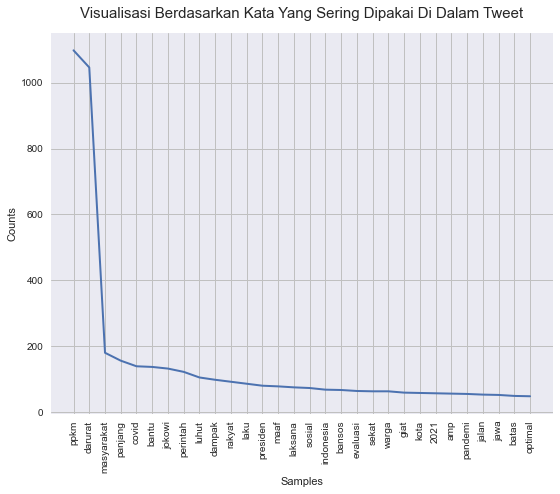

In [79]:
# Membuat visualisasi tweet berdasarkan isi tweet yang sering muncul sebanyak 30 kata yang sering digunakan
from cycler import cycler

plt.figure(figsize=(9, 7))
plt.title("Visualisasi Berdasarkan Kata Yang Sering Dipakai Di Dalam Tweet", fontdict={"fontsize":15}, pad=15)
plt.rc("axes", prop_cycle=(cycler("color", ["c"])))
fqdist_tweet.plot(30, cumulative=False)
plt.show()

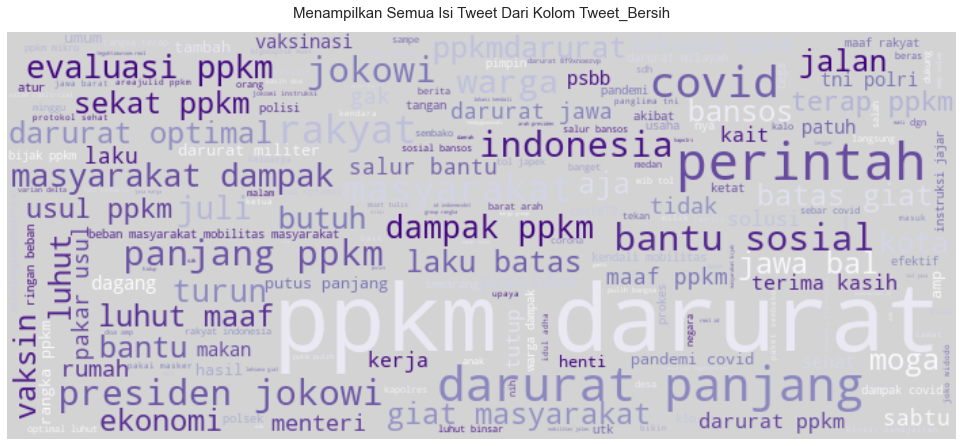

In [80]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data" dari kolom "Tweet_Bersih"  
all_tweet_post = " ".join(word for word in data["Tweet_Bersih"])
wordcloud = WordCloud(colormap="Purples", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_post)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Dari Kolom Tweet_Bersih", fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## 5. Memisahkan Label Setiap Sentimen Untuk Di Visualisasikan

In [81]:
# Menghapus spasi pada kolom "Sentimen"
data.Sentimen = list(map(lambda x: x.strip(), data.Sentimen))

### Positif

In [82]:
# Memisahkan label positif dari kolom "Sentimen"
data_positif = data[data.Sentimen == "positif"]
data_positif.head()

,Username,Tweet,Sentimen,Tweet_Tokenizing,Tweet_Stopword,Tweet_Normalisasi,Tweet_Stemming,Tweet_Bersih
2,polri presisi,kegiatan ppkm darurat polresta tangerang penye...,positif,"[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,...","[giat, ppkm, darurat, polresta, tangerang, sek...",giat ppkm darurat polresta tangerang sekat ken...
3,awal media nusantara | inspirasi dunia masa kini,patut ditiru begini cara yogyakarta hidupi pel...,positif,"[patut, ditiru, begini, cara, yogyakarta, hidu...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku...","[patut, tiru, yogyakarta, hidup, laku, kuliner...",patut tiru yogyakarta hidup laku kuliner ppkm ...
4,pelitanews,penyaluran bsps bulan juli desa arjawinangun d...,positif,"[penyaluran, bsps, bulan, juli, desa, arjawina...","[penyaluran, bsps, juli, desa, arjawinangun, d...","[penyaluran, bsps, juli, desa, arjawinangun, d...","[salur, bsps, juli, desa, arjawinangun, tengah...",salur bsps juli desa arjawinangun tengah pande...
5,pt. jasamarga,mekanisme penyekatan pada lokasi pengendalian ...,positif,"[mekanisme, penyekatan, pada, lokasi, pengenda...","[mekanisme, penyekatan, lokasi, pengendalian, ...","[mekanisme, penyekatan, lokasi, pengendalian, ...","[mekanisme, sekat, lokasi, kendali, mobilitas,...",mekanisme sekat lokasi kendali mobilitas jalan...
6,pt. jasamarga,lokasi pengendalian mobilitas jalan tol jasa m...,positif,"[lokasi, pengendalian, mobilitas, jalan, tol, ...","[lokasi, pengendalian, mobilitas, jalan, tol, ...","[lokasi, pengendalian, mobilitas, jalan, tol, ...","[lokasi, kendali, mobilitas, jalan, tol, jasa,...",lokasi kendali mobilitas jalan tol jasa marga ...


Karena kami ingin menampilkan visualisasi dari setiap isi tweet yang sudah bersih dari label positif maka dari itu kami akan mengambil kolom "Tweet_bersih" dari DataFrame data_positif. Proses ini juga akan kami lakukan untuk label sentimen netral dan sentimen negatif.

In [83]:
# Mengeluarkan isi tweet bersih dari DataFrame "data_positif"
data_tweet_positif = " ".join(str(c) for c in data_positif["Tweet_Bersih"])
data_tweet_positif

'giat ppkm darurat polresta tangerang sekat kendara bagi bansos polrikawalppkm polripresisi tyf8exkljr patut tiru yogyakarta hidup laku kuliner ppkm darurat wnkvu2tej9 awalmedianusantara berita salur bsps juli desa arjawinangun tengah pandemi covid ppkm darurat bcstzzymnz 2021 89uz2dzrgz mekanisme sekat lokasi kendali mobilitas jalan tol jasa marga group rangka terap ppkm darurat 3qukphp4ve lokasi kendali mobilitas jalan tol jasa marga group rangka terap ppkm darurat bj4mjgahcn wib tol japek karawang barat 200 arah jakarta laku sekat ppkm darurat wib tol japek cikarang barat arah cikampek padat laku sekat ppkm darurat cikampek dawuan cikarang cikunir cawang lancar tegak ppkm darurat laksana pilar pimpin drs sutang supriyanto n0lmhdsnbi camat ciputat timur sisir kerumun dagang kerumun menghimbau warga amp dagang jaga jarak makan sabtu perban salah sektor esensial operasi ppkm darurat pandemi covid bupati bogor kan upaya pemkab bogor laksana ppkm darurat nkrijaya dear jokowi jgn telan bu

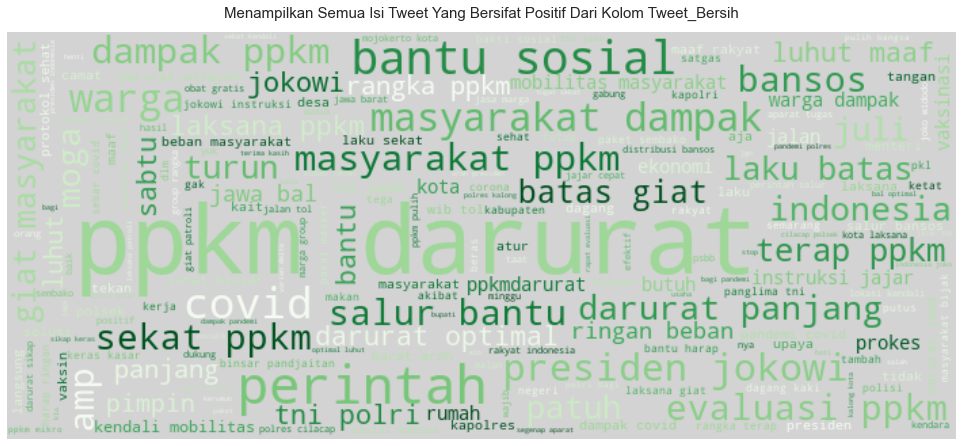

In [84]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data_positif" dari kolom "Tweet_Bersih"  
all_tweet_positive = " ".join(word for word in data_positif["Tweet_Bersih"])
wordcloud = WordCloud(colormap="Greens", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_positive)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Yang Bersifat Positif Dari Kolom Tweet_Bersih", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Netral

In [85]:
# Memisahkan label netral dari kolom "Sentimen"
data_netral = data[data.Sentimen == "netral"]
data_netral.head()

,Username,Tweet,Sentimen,Tweet_Tokenizing,Tweet_Stopword,Tweet_Normalisasi,Tweet_Stemming,Tweet_Bersih
7,vivacoid,bobby sebut kemungkinan besar ppkm darurat med...,netral,"[bobby, sebut, kemungkinan, besar, ppkm, darur...","[bobby, ppkm, darurat, medan, agustus, 9sxp69e...","[bobby, ppkm, darurat, medan, agustus, 9sxp69e...","[bobby, ppkm, darurat, medan, agustus, 9sxp69e...",bobby ppkm darurat medan agustus 9sxp69ekr5
15,sayang,usul ppkm darurat diperpanjang sampai dia bale...,netral,"[usul, ppkm, darurat, diperpanjang, sampai, di...","[usul, ppkm, darurat, diperpanjang, bales, cha...","[usul, ppkm, darurat, diperpanjang, bales, cha...","[usul, ppkm, darurat, panjang, bales, chatt, m...",usul ppkm darurat panjang bales chatt mohon pa...
18,transportasi jakarta,agoestonoo hai kak menggunakan strp berlaku s...,netral,"[agoestonoo, hai, kak, menggunakan, strp, berl...","[agoestonoo, hai, kak, strp, berlaku, ppkm, da...","[agoestonoo, hai, kak, strp, berlaku, ppkm, da...","[agoestonoo, hai, kak, strp, laku, ppkm, darur...",agoestonoo hai kak strp laku ppkm darurat ubah...
19,ketua dprd bikini bottom,ppkm darurat diperpanjang sampe summer ngaku s...,netral,"[ppkm, darurat, diperpanjang, sampe, summer, n...","[ppkm, darurat, diperpanjang, sampe, summer, n...","[ppkm, darurat, diperpanjang, sampe, summer, n...","[ppkm, darurat, panjang, sampe, summer, ngaku,...",ppkm darurat panjang sampe summer ngaku salah ...
24,din,tubirfess mungkin ppkm darurat ada fungsi men...,netral,"[tubirfess, mungkin, ppkm, darurat, ada, fungs...","[tubirfess, ppkm, darurat, fungsi, menurunkan,...","[tubirfess, ppkm, darurat, fungsi, menurunkan,...","[tubirfess, ppkm, darurat, fungsi, turun, angk...",tubirfess ppkm darurat fungsi turun angka covi...


In [86]:
# Mengeluarkan isi dari semua tweet bersih yang bersifat "netral"
data_tweet_netral = " ".join(str(c) for c in data_netral["Tweet_Bersih"])
data_tweet_netral

'bobby ppkm darurat medan agustus 9sxp69ekr5 usul ppkm darurat panjang bales chatt mohon paham varian rindu kendali menteri agoestonoo hai kak strp laku ppkm darurat ubah layan informasi aplikasi tije moga sehat kak ppkm darurat panjang sampe summer ngaku salah udah ngejahatin tom tubirfess ppkm darurat fungsi turun angka covid19 turun tahu masyarakat tka becandadoang terang pers menteri sosial tri rismaharini evaluasi laksana ppkm darurat sabtu 2021 lensakabinet kemensos ppkm darurat bandarlampung mobil patroli sulap gerobak sayur sseemsms tirta hudhi usaha non essential ppkm darurat buka habis baterai 7000mah samsung galaxy m62 ppkm darurat s1oqcwtfuh laptophia ppkm darurat gua aja faham luh manusia akal burung ftskipsdoh agoestonoo hai kak iya ppkm darurat ubah layan informasi aplikasi tije moga sehat kak protes ppkm darurat milik warkop datang wakil wali kota medan zkt3df2xuy panjangin nih guys fo0ydkdjpc pei prillie ndrews110611 dangdutempire rawa militannkri01 terus ppkm darurat 

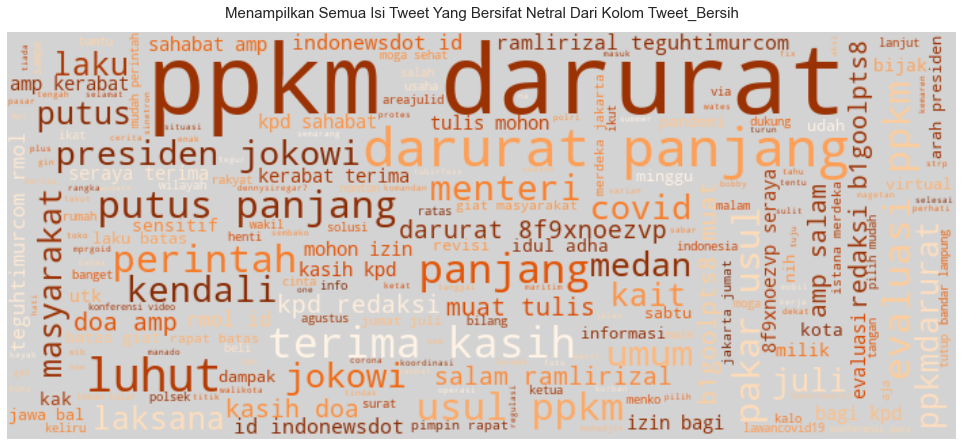

In [87]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data_netral" dari kolom "Tweet_Bersih" 
all_tweet_neutral = " ".join(word for word in data_netral["Tweet_Bersih"])
wordcloud = WordCloud(colormap="Oranges", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_neutral)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Yang Bersifat Netral Dari Kolom Tweet_Bersih", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Negatif

In [88]:
# Memisahkan label negatif dari kolom "Sentimen"
data_negatif = data[data.Sentimen == "negatif"]
data_negatif.head()

,Username,Tweet,Sentimen,Tweet_Tokenizing,Tweet_Stopword,Tweet_Normalisasi,Tweet_Stemming,Tweet_Bersih
0,liz,ini sudah fix kah https pg2htfp2k1,negatif,"[ini, sudah, fix, kah, https, pg2htfp2k1]","[fix, kah]","[fix, kah]","[fix, kah]",fix kah
1,celebritiesdotid,viral pemilik warkop ngamuk usai kena ppkm dar...,negatif,"[viral, pemilik, warkop, ngamuk, usai, kena, p...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d...","[viral, milik, warkop, ngamuk, kena, ppkm, dar...",viral milik warkop ngamuk kena ppkm darurat an...
11,toga,ppkm darurat dilakukan pemerintah setelah upay...,negatif,"[ppkm, darurat, dilakukan, pemerintah, setelah...","[ppkm, darurat, pemerintah, upaya, pemerintah,...","[ppkm, darurat, pemerintah, upaya, pemerintah,...","[ppkm, darurat, perintah, upaya, perintah, tid...",ppkm darurat perintah upaya perintah tidak ben...
12,detikcom,presiden jokowi menyoroti ppkm darurat jakarta...,negatif,"[presiden, jokowi, menyoroti, ppkm, darurat, j...","[presiden, jokowi, menyoroti, ppkm, darurat, j...","[presiden, jokowi, menyoroti, ppkm, darurat, j...","[presiden, jokowi, sorot, ppkm, darurat, jakar...",presiden jokowi sorot ppkm darurat jakarta das...
13,heri erpela. e-ktp.: maisuhandri bsc.,petpanjangan ppkm darurat covid19 bisa bikin r...,negatif,"[petpanjangan, ppkm, darurat, covid19, bisa, b...","[petpanjangan, ppkm, darurat, covid19, bikin, ...","[petpanjangan, ppkm, darurat, covid19, bikin, ...","[petpanjangan, ppkm, darurat, covid19, bikin, ...",petpanjangan ppkm darurat covid19 bikin rakyat...


In [89]:
# Mengeluarkan isi dari semua tweet bersih yang bersifat "negatif"
data_tweet_negatif = " ".join(str(c) for c in data_negatif["Tweet_Bersih"])
data_tweet_negatif

'fix kah viral milik warkop ngamuk kena ppkm darurat ancam cerai istri celebritiesdotid infocelebterkini aanw8kbu0h ppkm darurat perintah upaya perintah tidak bendung sebar covid19 tidak dukung orang2 mikirin kaum kadrun mabok agama presiden jokowi sorot ppkm darurat jakarta dasar hasil pantau kondisi pulogadung jaktim ramai sekat ppkm darurat petpanjangan ppkm darurat covid19 bikin rakyat ngamuk jarah massal jarah massal militer turun bantu polisi awal ppkm darurat menteri anggap darurat militer pecat luhut maaf ppkm darurat optimal putus panjang umum luhut maaf ppkm darurat optimal putus panjang umum via indopolitika ppkm darurat optimal luhut maaf rakyat indonesia luhutbinsarpanjaitan ppkmdarurat maaf kemenkomarves jokowi jansen jsp klo msh spt skrg yakin yakin ppkm darurat tidak hasil stok darah tip ppkm darurat pmi ajak masyarakat donor kota kalong pandemi covid sedia darah unit donor darah palang merah indonesia udd pmi kota kalong tip pandemi sedia darah dibu ppkm darurat pasien

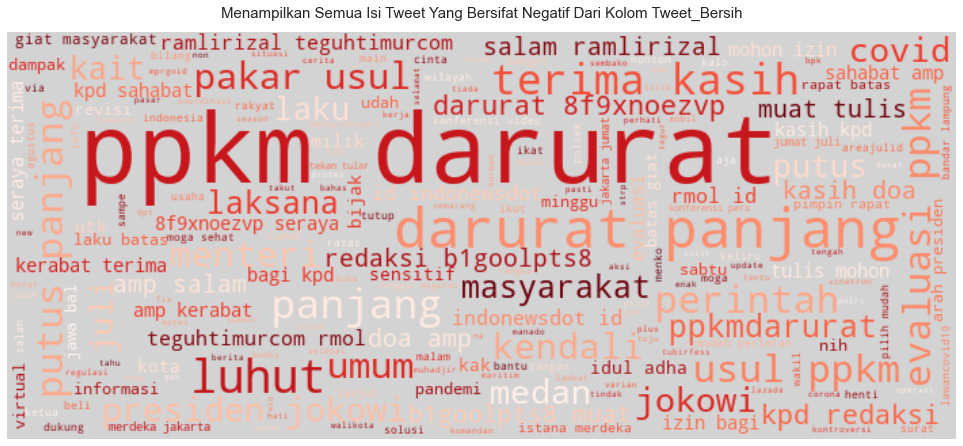

In [90]:
# Menampilkan sekaligus memvisualisasikan kata menggunakan wordcloud dari DataFrame "data_negatif" dari kolom "Tweet_Bersih" 
all_tweet_negative = " ".join(word for word in data_netral["Tweet_Bersih"])
wordcloud = WordCloud(colormap="Reds", width=700, height=300, 
                      mode="RGBA", background_color="lightgrey").generate(all_tweet_negative)
plt.figure(figsize=(17,10))
plt.title("Menampilkan Semua Isi Tweet Yang Bersifat Negatif Dari Kolom Tweet_Bersih", 
          fontdict={"fontsize":15}, pad = 15);
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## 5. Pemodelan Dengan Algoritma Machine Learning

In [91]:
data.head()

,Username,Tweet,Sentimen,Tweet_Tokenizing,Tweet_Stopword,Tweet_Normalisasi,Tweet_Stemming,Tweet_Bersih
0,liz,ini sudah fix kah https pg2htfp2k1,negatif,"[ini, sudah, fix, kah, https, pg2htfp2k1]","[fix, kah]","[fix, kah]","[fix, kah]",fix kah
1,celebritiesdotid,viral pemilik warkop ngamuk usai kena ppkm dar...,negatif,"[viral, pemilik, warkop, ngamuk, usai, kena, p...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d...","[viral, pemilik, warkop, ngamuk, kena, ppkm, d...","[viral, milik, warkop, ngamuk, kena, ppkm, dar...",viral milik warkop ngamuk kena ppkm darurat an...
2,polri presisi,kegiatan ppkm darurat polresta tangerang penye...,positif,"[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,...","[kegiatan, ppkm, darurat, polresta, tangerang,...","[giat, ppkm, darurat, polresta, tangerang, sek...",giat ppkm darurat polresta tangerang sekat ken...
3,awal media nusantara | inspirasi dunia masa kini,patut ditiru begini cara yogyakarta hidupi pel...,positif,"[patut, ditiru, begini, cara, yogyakarta, hidu...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku...","[patut, ditiru, yogyakarta, hidupi, pelaku, ku...","[patut, tiru, yogyakarta, hidup, laku, kuliner...",patut tiru yogyakarta hidup laku kuliner ppkm ...
4,pelitanews,penyaluran bsps bulan juli desa arjawinangun d...,positif,"[penyaluran, bsps, bulan, juli, desa, arjawina...","[penyaluran, bsps, juli, desa, arjawinangun, d...","[penyaluran, bsps, juli, desa, arjawinangun, d...","[salur, bsps, juli, desa, arjawinangun, tengah...",salur bsps juli desa arjawinangun tengah pande...


Karena pada pengujian kali ini data yang bersifat lebih dominan terhadap data dokumen maka kami akan menggunakan sebuah fungsi yang bernama TF-IDF. Teknik TF-IDF atau yang biasa disebut sebagai term frequency – inverse document frequency merupakan salah satu algoritma yang dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen. Teknik ini akan melakukan perhitungan dari sebuah kata kunci terhadap masing-masing dokumen.

In [92]:
# Melakukan teknik/proses TF-TDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
data_tfidf = tfidf.fit_transform(data["Tweet_Bersih"].astype("U"))
data_tfidf

<1000x3946 sparse matrix of type '<class 'numpy.float64'>'
	with 13917 stored elements in Compressed Sparse Row format>

In [93]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_tfidf, data["Sentimen"], test_size=0.2, random_state=50)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split: 
1. data_tfidf: merupakan sebuah fungsi yang berisi nilai pembobotan dari kolom "Tweet"
2. data_clean_stem: merupakan sebuah fungsi untuk mendeklarasikan/memanggil kolom "Sentimen"
3. test_size: Nilai presentase dari sebuah ukuran variabel test. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari variabel test mencapai 20% sehingga untuk ukuran variabel trainnya adalah 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya. Namun jika ditentukan nilai random_statenya maka data akan diacak (random).

In [94]:
# Pemanggilan model Multinomial Naive Bayes (MultinomialNB) beserta parameternya
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
    
}

grid_search_mnb = GridSearchCV(model_mnb, parameters, cv=30) # CV = Cross Validation

grid_search_mnb.fit(x_test, y_test)

GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

In [95]:
# Menggunakan library SMOTE untuk mengatasi label data yang imbalanced/tidak seimbang
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
x_res_smote, y_res_smote = sm.fit_resample(x_train, y_train)

In [96]:
# Melakukan pemanggilan model Multinomial Naive Bayes kembali dengan membuat variabel baru yaitu "sm_mnb" untuk membedakan
# mana yang sudah dilakukan proses SMOTE dan mana yang belum

sm_mnb = MultinomialNB()
sm_mnb.fit(x_res_smote, y_res_smote)

MultinomialNB()

In [97]:
# Melakukan pengujian untuk variabel test & varibael train
print("------------------------Prediksi Dari Variabel Latih-------------------------------")
prediction_test = grid_search_mnb.predict(x_test)
print(prediction_test)

print()

print("------------------------Prediksi Dari Variabel Uji---------------------------------")
prediction_train = sm_mnb.predict(x_train)
print(prediction_train)

------------------------Prediksi Dari Variabel Latih-------------------------------
['negatif' 'negatif' 'negatif' 'negatif' 'netral' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'netral' 'netral'
 'positif' 'negatif' 'negatif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'netral' 'netral' 'netral' 'positif'
 'positif' 'negatif' 'positif' 'positif' 'positif' 'negatif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'positif' 'positif' 'negatif' 'netral' 'negatif'
 'netral' 'positif' 'positif' 'netral' 'positif' 'netral' 'negatif'
 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif' 'positif'
 'netral' 'positif' 'negatif' 'positif' 'positif' 'negatif' 'netral'
 'positif' 'netral' 'netral' 'negatif' 'positif' 'negatif' 'positif'
 'positif' 'negatif' 'positif' 'netral' 'positif' 'netral' 'positif'
 'positif' 'negatif' 'negatif' 'negatif' 'netral' 'negatif' 'positif'
 'positif'

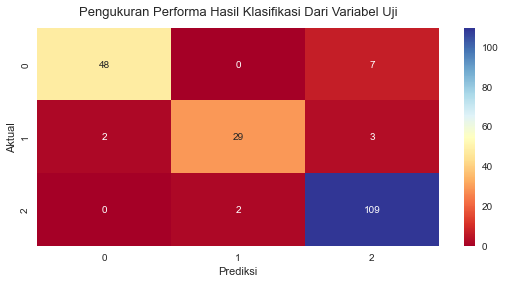

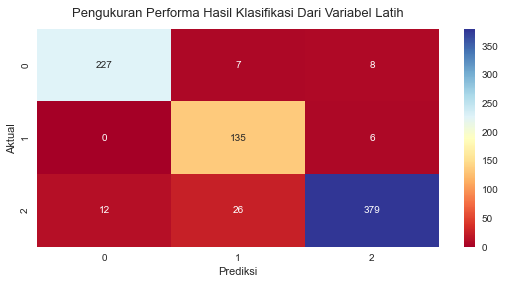

In [98]:
# Membuat visualisasi untuk menampilkan pengukuran performa dari hasil prediksi pada variabel uji & latih

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap="RdYlBu", fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Uji", fontdict={"fontsize":13}, pad=13)
plt.show()

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_train, prediction_train), annot=True, cmap="RdYlBu", fmt=".0f", ax=ax)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Pengukuran Performa Hasil Klasifikasi Dari Variabel Latih", fontdict={"fontsize":13}, pad=13)
plt.show()

In [99]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Multonimial Naive Bayes

print("------------------------Prediksi Dari Variabel Uji-------------------------------")
cr_test = classification_report(y_test, prediction_test)
print(cr_test)

print("------------------------Prediksi Dari Variabel Latih-------------------------------")
cr_train = classification_report(y_train, prediction_train)
print(cr_train)

------------------------Prediksi Dari Variabel Uji-------------------------------
              precision    recall  f1-score   support

     negatif       0.96      0.87      0.91        55
      netral       0.94      0.85      0.89        34
     positif       0.92      0.98      0.95       111

    accuracy                           0.93       200
   macro avg       0.94      0.90      0.92       200
weighted avg       0.93      0.93      0.93       200

------------------------Prediksi Dari Variabel Latih-------------------------------
              precision    recall  f1-score   support

     negatif       0.95      0.94      0.94       242
      netral       0.80      0.96      0.87       141
     positif       0.96      0.91      0.94       417

    accuracy                           0.93       800
   macro avg       0.91      0.93      0.92       800
weighted avg       0.93      0.93      0.93       800



## 6. Membuat Prediksi Akhir Sekaligus Memvisualisasikannya

In [100]:
# Membuat variabel baru yang dihasilkan dari hasil prediksi sentimen pada variabel test/uji
tweet_output_test = pd.DataFrame({"Sentimen": prediction_test})
tweet_output_test.head()

,Sentimen
0,negatif
1,negatif
2,negatif
3,negatif
4,netral


In [101]:
# Membuat variabel baru yang dihasilkan dari hasil prediksi sentimen pada variabel train/latih
tweet_output_train = pd.DataFrame({"Sentimen": prediction_train})
tweet_output_train.head()

,Sentimen
0,netral
1,positif
2,positif
3,negatif
4,positif


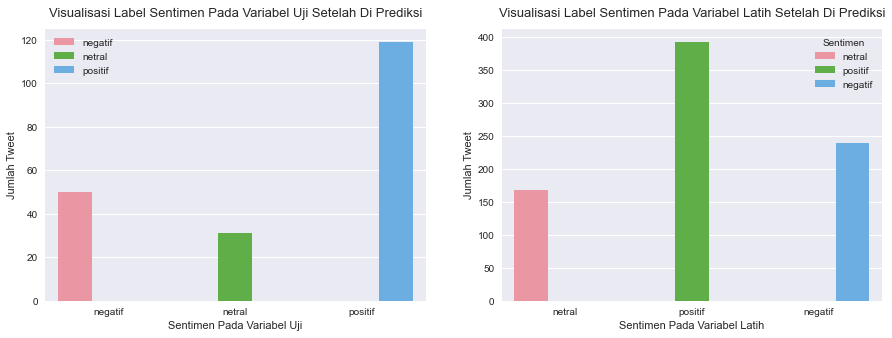

In [102]:
# Visualisasi untuk melihat sekaligus membandingkan hasil sentimen dari variable uji/test & latih/train
plt.figure(figsize=(15, 5))

# Visualiasi dari hasil prediksi pada variabel test/uji
plt.subplot(1, 2, 1)
sns.countplot(x="Sentimen", hue="Sentimen", data=tweet_output_test)
plt.title("Visualisasi Label Sentimen Pada Variabel Uji Setelah Di Prediksi", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Sentimen Pada Variabel Uji")
plt.ylabel("Jumlah Tweet")
plt.legend()

# Visualiasi dari hasil prediksi pada variabel train/latih
plt.subplot(1, 2, 2)
sns.countplot(x="Sentimen", hue="Sentimen", data=tweet_output_train)
plt.title("Visualisasi Label Sentimen Pada Variabel Latih Setelah Di Prediksi", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Sentimen Pada Variabel Latih")
plt.ylabel("Jumlah Tweet")
plt.show()